**3.1** se NumPy para gerar 1000 valores aleatórios em um vetor $ \vec{x} $ . Depois gere um vetor $\vec{y}$, tal que  $y_{i}=3x_{i}+10+e_{i}$ , onde  $e_{i} ∼ N(0,1)$ . Por fim, estime um modelo de regressão simples de  $Y$  em função de  $X$ .

2.584146496088436 10.860173668067137


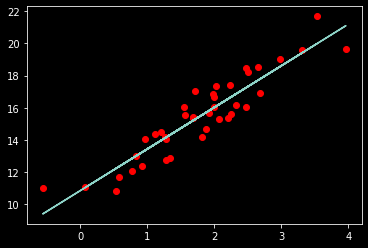

In [16]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.random.normal(2, 1, 40)
ei = np.random.normal(0, 1, 40)
yi = lambda x: 3 * x + 10 + ei

beta = sum((xi - np.mean(xi)) * (yi(xi) - np.mean(yi(xi)))/(sum((xi - np.mean(xi))**(2))))

alpha = np.mean(yi(xi) )  - beta * np.mean(xi)

print(beta,alpha)

plt.scatter(xi, yi(xi), color = 'r')

plt.plot(xi, xi * beta + alpha)

**3.2** Faça uma função que gera uma matriz aleatória  $X$  (escolha a distribuição) com  $n$  linhas e  $p$  colunas e um vetor $\vec{y}$, cujos valores são função das linhas de  $X$  com adição de ruído normal, de média  0  e variância  1 , e.g.  $y_{i}=3x_{i1} + 5x_{i2}+10+e_{i}$ , onde  $e_{i} ∼ N(0,1)$ . Os parâmetros da função geradora devem incluir  $n$ ,  $p$  e a função geradora de  $y$  (dica: use o operador lambda).

In [47]:
import numpy as np
np.random.seed(3122010)

def generate_data(n = 3, p = 2,f = lambda x: 2 * x[:,0]**(2) + 3*x[:,1] +  1):
    
    x = np.random.random((n, p))
    
    y = f(x) + np.random.normal(0, 1, n)
    
    return x,y

X,Y = generate_data()

print(X, Y)

[[0.0436472  0.60107472]
 [0.28496875 0.58567178]
 [0.137608   0.52751638]] [1.96304039 4.39711325 3.97505054]


**3.3** Implemente uma classe _LinearRegression_, com os métodos:

- _fit_ que recebe uma matriz  $X$  e um vetor $\vec{y}$ e ajusta uma regressão linear pelo método dos mínimos quadrados, guardando os coeficientes e o intercept como atributos

- _predict_ que recebe uma matriz  $X$  e estima os valores  $\hat{y}$ correspondentes

- _score_ que recebe uma matriz  $X$  e um vetor $\vec{y}$  e calcula o erro quadrático médio de estimação

Use a função geradora da questão anterior para gerar  $X_{1}$  e $\vec{y}_{1}$  e ajustar o seu modelo e depois gerar $X_{2}$  e $\vec{y}_{2}$ e avaliar o modelo ajustado.

In [49]:
np.random.seed(3122019)

class LinearRegression:
    def fit(self, X, y):
        self.coef = np.linalg.pinv(X.transpose() @ X) @ np.transpose(X) @ y
        return self

    def predict(self, X):
        return X @ self.coef
    
    def score(self, X, y):
        return np.mean((y - self.predict(X))**(2))

X, y = generate_data(n=5, p=2, f = lambda x: 2 * x[:,0]**2 + 3 * x[:,1] + 1)
lr = LinearRegression().fit(X,y)

print(X)
print()
print(y)
print()
print('Coeficientes : {}'.format(lr.coef))
print()
print('Predição : {}'.format(lr.predict(X)))
print()
print('Score : {}'.format(lr.score(X,y)))


[[0.38140576 0.79472444]
 [0.83723106 0.29058078]
 [0.06384561 0.41192892]
 [0.73589209 0.52317554]
 [0.00228603 0.53305588]]

[3.89229626 3.39653594 1.88252056 4.14314732 1.93126192]

Coeficientes : [2.85078609 3.68470903]

Predição : [4.01563454 3.45747228 1.69984839 4.02562056 1.97067279]

Score : 0.013532089274704126
